In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import statsmodels.api as sm
import warnings
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from scipy.stats import boxcox

#### read csv data

In [2]:
data = pd.read_csv("RawData.csv",sep=";")

In [3]:
data.head()

,ProductName,Week,Price,SalesQty.
0,Product1,2011-31,"1,58",361
1,Product1,2011-32,"1,9",282
2,Product1,2011-33,"1,9",315
3,Product1,2011-34,"1,9",254
4,Product1,2011-35,"1,9",197


#### data info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
ProductName    52 non-null object
Week           52 non-null object
Price          52 non-null object
SalesQty.      52 non-null int64
dtypes: int64(1), object(3)
memory usage: 1.8+ KB


#### convert date object to datetime format

In [5]:
data['Week'] = data['Week'].astype('str')
data['Date'] = pd.to_datetime(data.pop('Week') + '0', format='%Y-%W%w')

#### replace comma with dots in price variable and convert it to float

In [6]:
data['Price'] = data['Price'] .apply(lambda x: str(x.replace(',','.')))
data['Price'] = data['Price'].astype(float)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
ProductName    52 non-null object
Price          52 non-null float64
SalesQty.      52 non-null int64
Date           52 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.8+ KB


In [8]:
data.head()

,ProductName,Price,SalesQty.,Date
0,Product1,1.58,361,2011-08-07
1,Product1,1.90,282,2011-08-14
2,Product1,1.90,315,2011-08-21
3,Product1,1.90,254,2011-08-28
4,Product1,1.90,197,2011-09-04


In [9]:
data.describe()

,Price,SalesQty.
count,52.000000,52.000000
mean,2.004231,170.423077
std,0.138087,47.918782
min,1.580000,110.000000
25%,1.900000,142.250000
50%,2.015000,160.000000
75%,2.090000,176.000000
max,2.200000,361.000000


##### the standart deviations are small than mean, by this we can infer that there is no so much variation in data

#### lets look at if there are more than one product for each week

In [10]:
data.groupby('Date')['ProductName'].size()

Date
2011-08-07    1
2011-08-14    1
2011-08-21    1
2011-08-28    1
2011-09-04    1
2011-09-11    1
2011-09-18    1
2011-09-25    1
2011-10-02    1
2011-10-09    1
2011-10-16    1
2011-10-23    1
2011-10-30    1
2011-11-06    1
2011-11-13    1
2011-11-20    1
2011-11-27    1
2011-12-04    1
2011-12-11    1
2011-12-18    1
2011-12-25    1
2012-01-01    1
2012-01-08    1
2012-01-15    1
2012-01-22    1
2012-01-29    1
2012-02-05    1
2012-02-12    1
2012-02-19    1
2012-02-26    1
2012-03-04    1
2012-03-11    1
2012-03-18    1
2012-03-25    1
2012-04-01    1
2012-04-08    1
2012-04-15    1
2012-04-22    1
2012-04-29    1
2012-05-06    1
2012-05-13    1
2012-05-20    1
2012-05-27    1
2012-06-03    1
2012-06-10    1
2012-06-17    1
2012-06-24    1
2012-07-01    1
2012-07-08    1
2012-07-15    1
2012-07-22    1
2012-07-29    1
Name: ProductName, dtype: int64

##### comment : there is only one product for each week

#### so we can drop product column

In [11]:
data = data.drop(['ProductName'], axis=1)

In [12]:
data = data.set_index('Date')
data = data.sort_index()

data.head()

,Price,SalesQty.
Date,,
2011-08-07,1.58,361
2011-08-14,1.90,282
2011-08-21,1.90,315
2011-08-28,1.90,254
2011-09-04,1.90,197


#### and give Date column as index

#### lets look at null values

In [13]:
data.isnull().sum()

Price        0
SalesQty.    0
dtype: int64

##### comment: there is no null value in dataset

#### lets get the distributions

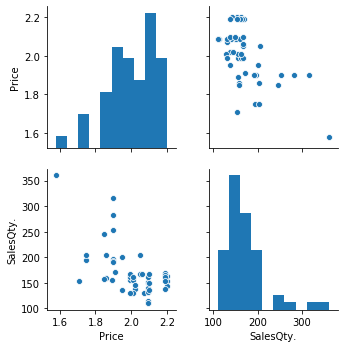

In [14]:
sns.pairplot(data)

##### comment: it seems there is some linear relationship between sales and price

##### comment : the Price is left skewed ad Sales is right skewed also

#### lets plot time series graph

In [15]:
data = data.reset_index()
data = data.sort_values(by='Date')

In [16]:
data.head()

,Date,Price,SalesQty.
0,2011-08-07,1.58,361
1,2011-08-14,1.90,282
2,2011-08-21,1.90,315
3,2011-08-28,1.90,254
4,2011-09-04,1.90,197


#### for sales:

C:\Users\Hincal\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


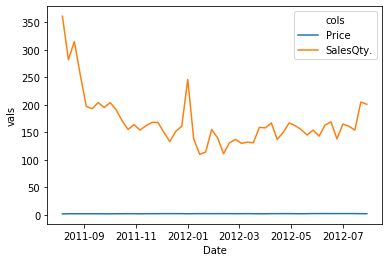

In [17]:
df = data.melt('Date', var_name='cols',  value_name='vals')
g = sns.lineplot(x="Date", y="vals", hue='cols', data=df)

#### comment: the changes in price are so low , we cannot make inference about effects of changes in time manner from this graph

#### lets look at them in seperate graphs

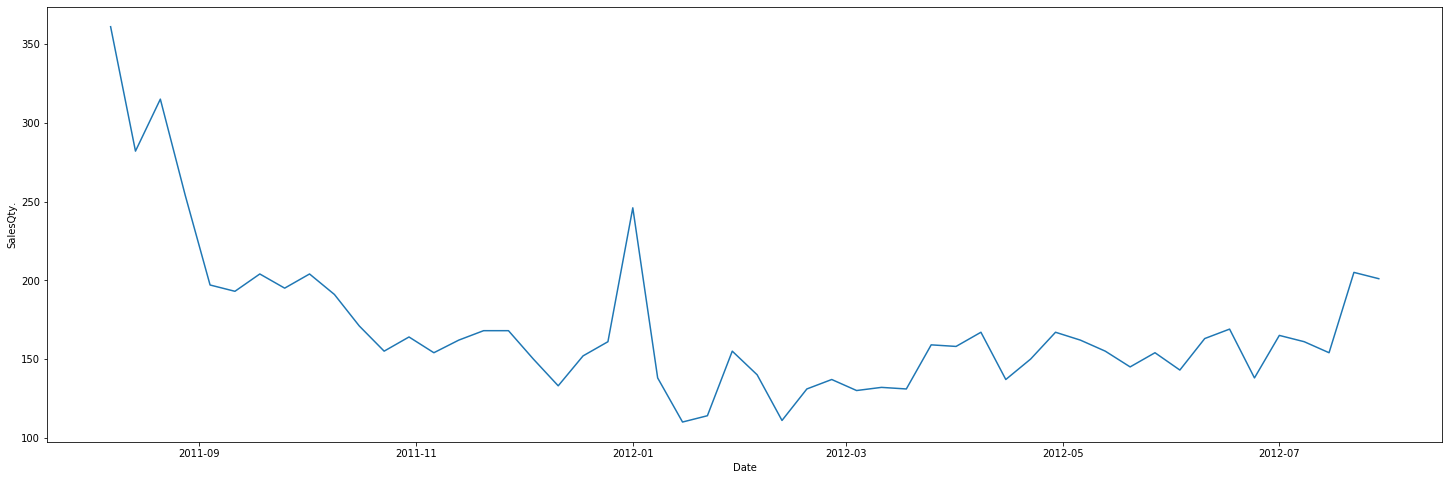

In [18]:
fig = plt.figure(figsize=(25, 8))
sns.lineplot(x="Date", y="SalesQty.",
             ci=None, data=data)

#### for price:

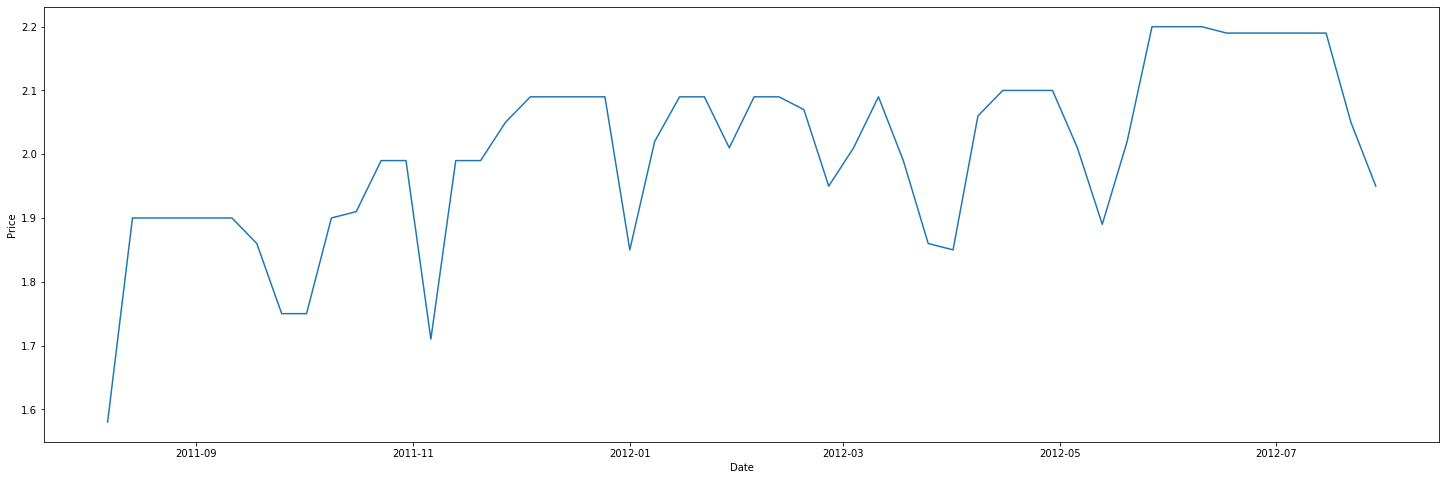

In [19]:
fig = plt.figure(figsize=(25, 8))
sns.lineplot(x="Date", y="Price",
             ci=None, data=data)

#### comment : when price falls sales increases, and also there is a seasonality in price variable which occurs in every two months

#### lets check if distribution is gaussian

In [20]:
# Shapiro-Wilk Test
from numpy.random import seed
from scipy.stats import shapiro

cols_to_check_dist = data.columns[1:3].tolist()

# seed the random number generator
seed(1)
# normality test
for i in cols_to_check_dist:
    stat, p = shapiro(data[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
    alpha = 0.05
    if p > alpha:
        print('Sample %s looks Gaussian (fail to reject H0)' %i)
    else:
        print('Sample %s does not look Gaussian (reject H0)' %i)

Statistics=0.940, p=0.012
Sample Price does not look Gaussian (reject H0)
Statistics=0.791, p=0.000
Sample SalesQty. does not look Gaussian (reject H0)


##### comment : variables doesnt look gaussian, so we can choose non-parametric approaches or try to make it gaussian by transformations

#### lets look at correlations by non-parametric approach

In [21]:
cols_to_check_dist

['Price', 'SalesQty.']

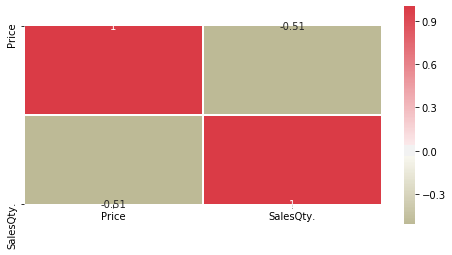

In [22]:
# data doesnt look gaussian so we should take spearman correlation to check correlations

spearman_corrx = {}
for i in cols_to_check_dist:
    spearman_corrx[i] = data.loc[:,i]
    
spearman_df = pd.DataFrame.from_dict(spearman_corrx)


# Compute the correlation matrix
corr = spearman_df.corr(method='spearman')

# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(80, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##### comment: there is negative but strong linear relationship with Price and Sales

#### lets find outliers

#### I will create a non-outliered dataframe names "data2"

In [23]:
data2 = deepcopy(data)

In [24]:
Q1 = data2[cols_to_check_dist].quantile(0.25)
Q3 = data2[cols_to_check_dist].quantile(0.75)
IQR = Q3 - Q1

columns_desc= cols_to_check_dist

desc_df = pd.DataFrame()
for col in columns_desc:
    desc_df[col] = data2[col].describe(include='all')
    desc_df[col + '_valcounts'] = np.nan
    
for col in columns_desc:
    desc_df = desc_df.T
    desc_df.columns = ['count','mean','std','min','q25','q50','q75','max']
    desc_df = desc_df.T
    desc_df.loc['min',col + '_valcounts'] = data2.loc[(data2[col].values == desc_df.loc['min',col])].count()['Date']
    desc_df.loc['q25',col + '_valcounts'] = data2.loc[(data2[col].values >= desc_df.loc['min',col]) & (data2[col].values < desc_df.loc['q25',col])].count()['Date']
    desc_df.loc['q50',col + '_valcounts'] = data2.loc[(data2[col].values >= desc_df.loc['q25',col]) & (data2[col].values < desc_df.loc['q50',col])].count()['Date']
    desc_df.loc['q75',col + '_valcounts'] = data2.loc[(data2[col].values >= desc_df.loc['q50',col]) & (data2[col].values < desc_df.loc['q75',col])].count()['Date']
    desc_df.loc['max',col + '_valcounts'] = data2.loc[(data2[col].values >= desc_df.loc['q75',col]) & (data2[col].values < desc_df.loc['max',col])].count()['Date']
    desc_df.loc['std',col + '_valcounts'] = data2.loc[(data2[col].values >= (Q1[col] -  1.5*IQR[col])) & (data2[col].values <= (Q3[col] +  1.5*IQR[col]))].count()['Date']
    desc_df.loc['count',col + '_valcounts'] = desc_df.loc['count',col]
    desc_df.loc['mean',col + '_valcounts'] = desc_df.loc['count',col + '_valcounts'] -  desc_df.loc['std',col + '_valcounts']
    
    
desc_df_cols = desc_df.columns.tolist()
end_words = ['_valcounts']
val_count_cols = [col for col in desc_df_cols if any(col.endswith(end) for end in end_words)]

desc_df_cnts = desc_df[val_count_cols]

desc_df_cnts = desc_df_cnts.T

desc_df_cnts.columns = ['all_count','outlier_cnts','non_outlier_cnts','equal_min_cnts','betw_q25_min_cnts','betw_q50_q25_cnts','betw_q75_q50_cnts','betw_max_q75_cnts']
desc_df_cnts = desc_df_cnts.T

desc_df_cnts

,Price_valcounts,SalesQty._valcounts
all_count,52.0,52.0
outlier_cnts,1.0,5.0
non_outlier_cnts,51.0,47.0
equal_min_cnts,1.0,1.0
betw_q25_min_cnts,9.0,13.0
betw_q50_q25_cnts,17.0,13.0
betw_q75_q50_cnts,6.0,13.0
betw_max_q75_cnts,17.0,12.0


#### there are so few outliers, lets replace them by column means

In [25]:
mean = {}
for col in cols_to_check_dist:
    mean[col] = data2[col].mean()
    data2[col][((data2[col] < (Q1[col] -  1.5*IQR[col])) | (data[col] > (Q3[col] +  1.5*IQR[col])))] = np.nan
    data2[col].fillna(mean[col],inplace=True)

C:\Users\Hincal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### now check the descriptives and distributions again

In [26]:
data2.describe()

,Price,SalesQty.
count,52.000000,52.000000
mean,2.012389,158.771450
std,0.124384,23.296350
min,1.710000,110.000000
25%,1.900000,142.250000
50%,2.015000,160.000000
75%,2.090000,170.423077
max,2.200000,205.000000


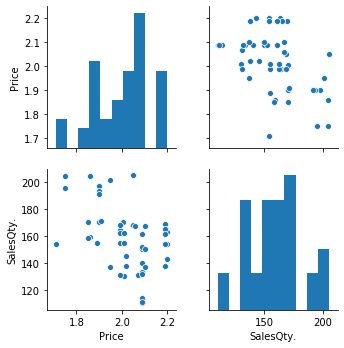

In [27]:
sns.pairplot(data2)

##### comment : more normalized data we have now

##### check correlations to see if there is an improvement

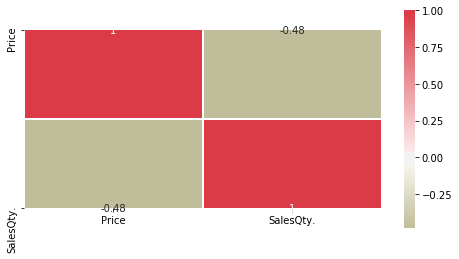

In [28]:
# data doesnt look gaussian so we should take spearman correlation to check correlations

spearman_corrx = {}
for i in cols_to_check_dist:
    spearman_corrx[i] = data2.loc[:,i]
    
spearman_df = pd.DataFrame.from_dict(spearman_corrx)


# Compute the correlation matrix
corr = spearman_df.corr(method='spearman')

# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(80, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### comment: there is a small decrease in correlation but it is in acceptable range, so we can use this data with algorithms which have linear assumptions

#### lets try also make some transformations on non-outliered data to fit the distribution to normal

#### lets plot firstly the distribution of price variable

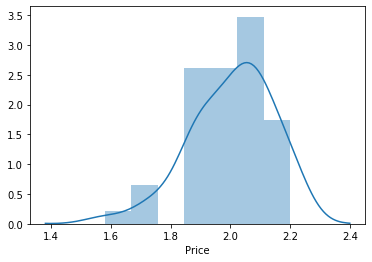

In [29]:
sns.distplot(data.Price,ax=plt.gca())

#### use box-cox transformations

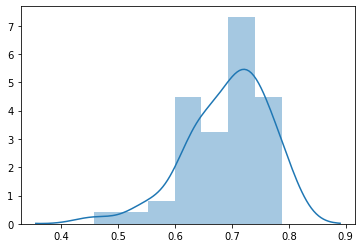

In [30]:
from scipy.stats import boxcox
price_0 = boxcox(data.Price,0)
sns.distplot(price_0,ax=plt.gca())

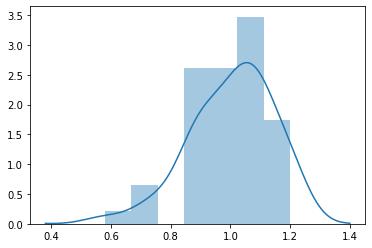

In [31]:
from scipy.stats import boxcox
price_1 = boxcox(data.Price,1)
sns.distplot(price_1,ax=plt.gca())

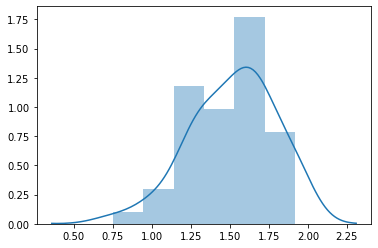

In [32]:
from scipy.stats import boxcox
price_2 = boxcox(data.Price,2)
sns.distplot(price_2,ax=plt.gca())

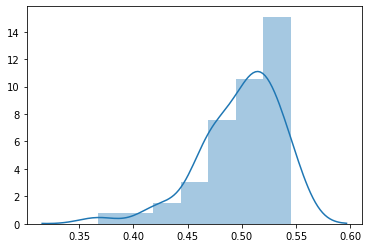

In [33]:
from scipy.stats import boxcox
price__1 = boxcox(data.Price,-1)
sns.distplot(price__1,ax=plt.gca())

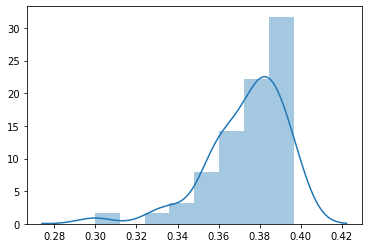

In [34]:

price__2 = boxcox(data.Price,-2)
sns.distplot(price__2,ax=plt.gca())

##### comment: we can use "-1" log transformation in future

#### lets make same thing for sales variable

#### the original distribution of sales :

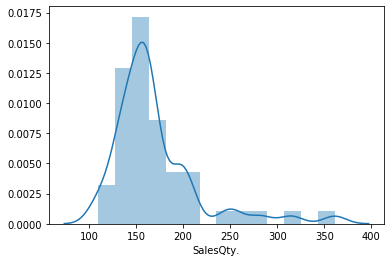

In [35]:
sns.distplot(data['SalesQty.'],ax=plt.gca())

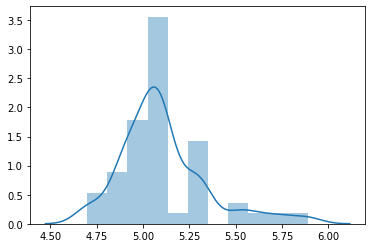

In [36]:
sales_0 = boxcox(data['SalesQty.'],0)
sns.distplot(sales_0,ax=plt.gca())

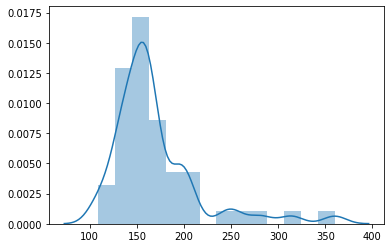

In [37]:
sales_1 = boxcox(data['SalesQty.'],1)
sns.distplot(sales_1,ax=plt.gca())

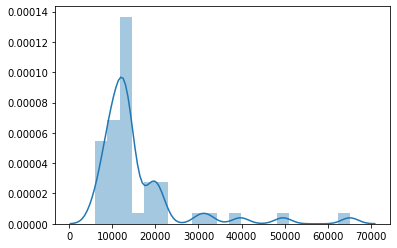

In [38]:
sales_2 = boxcox(data['SalesQty.'],2)
sns.distplot(sales_2,ax=plt.gca())

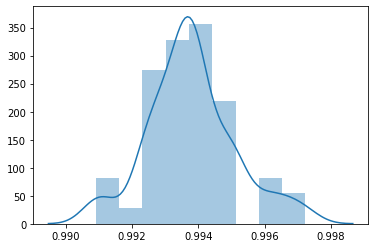

In [39]:
sales__1 = boxcox(data['SalesQty.'],-1)
sns.distplot(sales__1,ax=plt.gca())

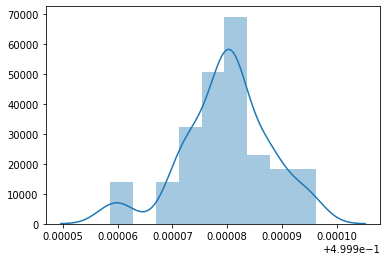

In [40]:
sales__2 = boxcox(data['SalesQty.'],-2)
sns.distplot(sales__2,ax=plt.gca())

In [41]:
sales_tup = (sales__2,sales__1,sales_0,sales_1,sales_2)
price_tup = (price__2,price__1,price_0,price_1,price_2)

In [42]:
dct={}
for sale in range(len(sales_tup)):
    for pri in range(len(price_tup)):
        dct[sale,pri] = np.corrcoef(sales_tup[sale],price_tup[pri])[0][1]

print(min(dct, key=dct.get))

(4, 0)


In [43]:
np.corrcoef(sales_2,price__2)

array([[ 1.        , -0.63310651],
       [-0.63310651,  1.        ]])

##### comment : we now have more correlated variables with log transformations !

In [44]:
data['sales_2'] = sales_2
data['price__2'] = price__2

In [45]:
data = data.set_index('Date')
data = data.sort_index()

In [46]:
data.head()

,Price,SalesQty.,sales_2,price__2
Date,,,,
2011-08-07,1.58,361,65160.0,0.299712
2011-08-14,1.90,282,39761.5,0.361496
2011-08-21,1.90,315,49612.0,0.361496
2011-08-28,1.90,254,32257.5,0.361496
2011-09-04,1.90,197,19404.0,0.361496


### to the this point : I looked at null counts, outliers, distributions, correlations and made transformations, so feature engineering part is finished

#### now lets create some models 

### firstly I will make basic time series model with ony Sales variable

In [47]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = 44
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

series = data['SalesQty.']
# evaluate parameters
p_values = [0, 1, 2, 3, 5, 6]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=462.796
ARIMA(0, 0, 1) MSE=370.897
ARIMA(0, 0, 2) MSE=745.362
ARIMA(0, 1, 0) MSE=690.784
ARIMA(0, 1, 1) MSE=656.683
ARIMA(0, 1, 2) MSE=669.015
ARIMA(0, 2, 0) MSE=1691.565
ARIMA(0, 2, 1) MSE=580.838
ARIMA(1, 0, 0) MSE=528.517
ARIMA(1, 0, 1) MSE=429.033
ARIMA(1, 0, 2) MSE=361.410
ARIMA(1, 1, 0) MSE=651.294
ARIMA(1, 2, 0) MSE=1007.576
ARIMA(2, 0, 0) MSE=486.856
ARIMA(2, 0, 1) MSE=478.665
ARIMA(2, 0, 2) MSE=510.553
ARIMA(2, 1, 0) MSE=638.942
ARIMA(2, 1, 1) MSE=670.981
ARIMA(2, 1, 2) MSE=701.000
ARIMA(2, 2, 0) MSE=576.169
ARIMA(3, 0, 0) MSE=468.907
ARIMA(3, 0, 1) MSE=476.984
ARIMA(3, 0, 2) MSE=494.000
ARIMA(3, 1, 0) MSE=769.343
ARIMA(3, 1, 1) MSE=676.019
ARIMA(3, 2, 0) MSE=938.466
ARIMA(3, 2, 1) MSE=535.641
ARIMA(5, 0, 0) MSE=602.990
ARIMA(5, 0, 1) MSE=537.976
ARIMA(5, 0, 2) MSE=521.323
ARIMA(5, 1, 0) MSE=796.821
ARIMA(5, 1, 1) MSE=819.707
ARIMA(5, 1, 2) MSE=805.442
ARIMA(5, 2, 0) MSE=569.812
ARIMA(5, 2, 1) MSE=518.352
ARIMA(6, 0, 0) MSE=607.585
ARIMA(6, 0, 1) MSE=613.844

#### lets make a lineer regression model with original variables to see if we can achive a better MSE 

In [48]:
X = data['Price']
y = data['SalesQty.']
train_size = 44
X_train, X_test, y_train, y_test = X[0:train_size], X[train_size:],y[0:train_size], y[train_size:]

model = sm.OLS(y_train.values.reshape(-1,1), X_train.values.reshape(-1,1))
results = model.fit()
print(results.summary())

y_pred=results.predict(X_test.values.reshape(-1,1))
print('Mean Squared Error:', mean_squared_error(y_test.values.reshape(-1,1), y_pred)) 

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              354.0
Date:                Sun, 05 Jan 2020   Prob (F-statistic):                    2.25e-22
Time:                        13:21:57   Log-Likelihood:                         -241.53
No. Observations:                  44   AIC:                                      485.1
Df Residuals:                      43   BIC:                                      486.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### now lets make a linear regression model with non-outliered data

In [49]:
X = data2['Price']
y = data2['SalesQty.']
train_size = 44
X_train, X_test, y_train, y_test = X[0:train_size], X[train_size:],y[0:train_size], y[train_size:]

model = sm.OLS(y_train.values.reshape(-1,1), X_train.values.reshape(-1,1))
results = model.fit()
print(results.summary())

y_pred=results.predict(X_test.values.reshape(-1,1))
print('Mean Squared Error:', mean_squared_error(y_test.values.reshape(-1,1), y_pred)) 

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1226.
Date:                Sun, 05 Jan 2020   Prob (F-statistic):                    3.07e-33
Time:                        13:21:57   Log-Likelihood:                         -210.86
No. Observations:                  44   AIC:                                      423.7
Df Residuals:                      43   BIC:                                      425.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### lets create a model with log-tranformed data

In [50]:
X = data['price__2']
y = data['sales_2']
train_size = 44
X_train, X_test, y_train, y_test = X[0:train_size], X[train_size:],y[0:train_size], y[train_size:]

model = sm.OLS(y_train.values.reshape(-1,1), X_train.values.reshape(-1,1))
results = model.fit()
print(results.summary())

y_pred=results.predict(X_test.values.reshape(-1,1))
print('Mean Squared Error:', mean_squared_error(y_test.values.reshape(-1,1), y_pred)) 

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.628
Model:                            OLS   Adj. R-squared (uncentered):              0.619
Method:                 Least Squares   F-statistic:                              72.52
Date:                Sun, 05 Jan 2020   Prob (F-statistic):                    8.93e-11
Time:                        13:21:57   Log-Likelihood:                         -475.30
No. Observations:                  44   AIC:                                      952.6
Df Residuals:                      43   BIC:                                      954.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### lets create some variables for linear regression

In [51]:
def rolling_avg(df, column, point, time_idx='Date', name_format="{}_{}_week_average", verbose=True):
    try:
        if verbose:
            print("average column: {} point: {}".format(column, point))
        name = name_format.format(column, point)
        print(name)
        result = df[column].rolling(window=point).mean()
        df[name] = result
        return df
    except Exception as ex:
        print(ex)
        raise

In [52]:
points = [2, 3, 4, 5, 6, 7, 8, 9 ,10]

for rol_col in ['Price']:
    for point in points:
        data = rolling_avg(df=data, column=rol_col, point=point)

average column: Price point: 2
Price_2_week_average
average column: Price point: 3
Price_3_week_average
average column: Price point: 4
Price_4_week_average
average column: Price point: 5
Price_5_week_average
average column: Price point: 6
Price_6_week_average
average column: Price point: 7
Price_7_week_average
average column: Price point: 8
Price_8_week_average
average column: Price point: 9
Price_9_week_average
average column: Price point: 10
Price_10_week_average


In [53]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0, inplace=True)

In [54]:
data.head()

,Price,SalesQty.,sales_2,price__2,Price_2_week_average,Price_3_week_average,Price_4_week_average,Price_5_week_average,Price_6_week_average,Price_7_week_average,Price_8_week_average,Price_9_week_average,Price_10_week_average
Date,,,,,,,,,,,,,
2011-08-07,1.58,361,65160.0,0.299712,0.00,0.000000,0.00,0.000,0.0,0.0,0.0,0.0,0.0
2011-08-14,1.90,282,39761.5,0.361496,1.74,0.000000,0.00,0.000,0.0,0.0,0.0,0.0,0.0
2011-08-21,1.90,315,49612.0,0.361496,1.90,1.793333,0.00,0.000,0.0,0.0,0.0,0.0,0.0
2011-08-28,1.90,254,32257.5,0.361496,1.90,1.900000,1.82,0.000,0.0,0.0,0.0,0.0,0.0
2011-09-04,1.90,197,19404.0,0.361496,1.90,1.900000,1.90,1.836,0.0,0.0,0.0,0.0,0.0


In [55]:
X = data['Price_2_week_average']
y = data['SalesQty.']
train_size = 44
X_train, X_test, y_train, y_test = X[0:train_size], X[train_size:],y[0:train_size], y[train_size:]

model = sm.OLS(y_train.values.reshape(-1,1), X_train)
results = model.fit()
print(results.summary())

y_pred=results.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test.values.reshape(-1,1), y_pred)) 

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.836
Model:                            OLS   Adj. R-squared (uncentered):              0.832
Method:                 Least Squares   F-statistic:                              218.6
Date:                Sun, 05 Jan 2020   Prob (F-statistic):                    1.82e-18
Time:                        13:21:57   Log-Likelihood:                         -250.70
No. Observations:                  44   AIC:                                      503.4
Df Residuals:                      43   BIC:                                      505.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

#### comment : ARIMA(1,0,2) model is the winner with fewest MSE

#### lets define ARIMA model again with whole data

                              ARMA Model Results                              
Dep. Variable:              SalesQty.   No. Observations:                   52
Model:                     ARMA(1, 2)   Log Likelihood                -250.166
Method:                       css-mle   S.D. of innovations             29.187
Date:                Sun, 05 Jan 2020   AIC                            510.332
Time:                        13:21:57   BIC                            520.089
Sample:                    08-07-2011   HQIC                           514.073
                         - 07-29-2012                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             214.8299     56.047      3.833      0.000     104.980     324.680
ar.L1.SalesQty.     0.9580      0.048     19.992      0.000       0.864       1.052
ma.L1.SalesQty.    -0.2460      

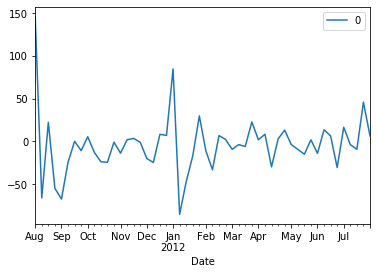

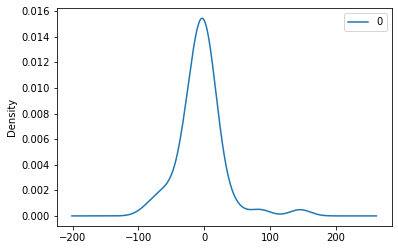

                0
count   52.000000
mean    -4.127301
std     34.749255
min    -85.394695
25%    -17.733044
50%     -3.648467
75%      6.493989
max    146.170110


In [56]:
data['SalesQty.']
# fit model
model = ARIMA(series, order=(1,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [57]:
data.tail()

,Price,SalesQty.,sales_2,price__2,Price_2_week_average,Price_3_week_average,Price_4_week_average,Price_5_week_average,Price_6_week_average,Price_7_week_average,Price_8_week_average,Price_9_week_average,Price_10_week_average
Date,,,,,,,,,,,,,
2012-07-01,2.19,165,13612.0,0.395749,2.19,2.190000,2.1925,2.194,2.195000,2.170000,2.13500,2.121111,2.119
2012-07-08,2.19,161,12960.0,0.395749,2.19,2.190000,2.1900,2.192,2.193333,2.194286,2.17250,2.141111,2.128
2012-07-15,2.19,154,11857.5,0.395749,2.19,2.190000,2.1900,2.190,2.191667,2.192857,2.19375,2.174444,2.146
2012-07-22,2.05,205,21012.0,0.381023,2.12,2.143333,2.1550,2.162,2.166667,2.171429,2.17500,2.177778,2.162
2012-07-29,1.95,201,20200.0,0.368508,2.00,2.063333,2.0950,2.114,2.126667,2.135714,2.14375,2.150000,2.155


#### print the forecasts

In [58]:
model_fit.forecast(steps=8)[0].tolist()

[197.3576256350529,
 197.7227870226353,
 198.44044494362223,
 199.12799648798006,
 199.786704644505,
 200.4177794185101,
 201.02238005452867,
 201.6016171657733]

## here is the final of part 1 ##

### *** ###

## part2

#### our model's MSE = 361.410 so RMSE is :

In [59]:
RMSE = np.sqrt(361.410)
RMSE

19.010786411929413

#### so safety stock is :

In [60]:
SS = RMSE * 3.09
SS = SS.astype(int)

SS

58

#### create new data frame to find optimal ordered quantities

In [61]:
new_data = {'Name':['Product1', 'Product1', 'Product1', 'Product1', 'Product1', 'Product1', 'Product1', 'Product1'],
        'forecast':model_fit.forecast(steps=8)[0].tolist(),
        'Forecasting_Date' : ['2012-08-07','2012-08-15','2012-08-23','2012-08-31','2012-09-08','2012-09-16','2012-09-24','2012-10-01'],
        'Price':[2.09, 2.22, 2.25, 2.25, 2.08, 1.95, 2.12, 1.93],
        'Ordered_Stock_Amount' : [200,'NaN','NaN','NaN','NaN','NaN','NaN',75],
        'Left_Stock_Amount': [58,'NaN','NaN','NaN','NaN','NaN','NaN','NaN']}
  
df = pd.DataFrame(new_data) 

df['forecast'] = df['forecast'].astype(int)

df

,Name,forecast,Forecasting_Date,Price,Ordered_Stock_Amount,Left_Stock_Amount
0,Product1,197,2012-08-07,2.09,200,58
1,Product1,197,2012-08-15,2.22,NaN,NaN
2,Product1,198,2012-08-23,2.25,NaN,NaN
3,Product1,199,2012-08-31,2.25,NaN,NaN
4,Product1,199,2012-09-08,2.08,NaN,NaN
5,Product1,200,2012-09-16,1.95,NaN,NaN
6,Product1,201,2012-09-24,2.12,NaN,NaN
7,Product1,201,2012-10-01,1.93,75,NaN


### if company plans to start with 200 stock order at first and also wants 75 units left in stock at the end of forecasting date,due to our forecasted demands,I think it will be optimal to increase stocks  in only last week , to avoid all time costs and holding costs

### Steps in Optimization Algorithm :
### In above dataframe, I set First Rows Ordered_Stock Amount to 200 and last row to 75 and first rows left stock level to 58
#### 1-) check if value in loop equals to last value (75) or not
#### 2-) If value in loop doesnt equal to 75 then
#### 3-) Calculate order as Safety_Forecast + Forecasted Value to hold cost minimum (logic is order as minimum as we can)
#### 4-) Calculate left Stock amount from calculated order_amount - forecast
#### 5-) continue to loop
#### if value in loop comes to last row , so it equals to 75 then
#### 6-) Calculate last week's ordered quantity by looking previous week's left stock amount + last week's forecast + 75 - previous week's left stock amount , to find minimum costed order amount 
#### 7-) Calculate the left stock amount from above calculated ordered amount  - forecast which will set it to 75

In [62]:
Safety_Stock = SS
df2 = deepcopy(df)
for i in range(1,len(df2)):
    # above I created a dataframe with last value is 75, it is symbolic number,
    # so firstly in my loop, I will look at the related number is equal to 75 or not
    if df2.loc[i,'Ordered_Stock_Amount'] !=75:
        df2.loc[i,'Ordered_Stock_Amount'] = Safety_Stock + df2.loc[i,'forecast']
        df2.loc[i,'Left_Stock_Amount'] = df2.loc[i,'Ordered_Stock_Amount'] - df2.loc[i,'forecast']
    else:
        df2.loc[i,'Ordered_Stock_Amount'] = (df2.loc[i-1,'Left_Stock_Amount'] + df2.loc[i,'forecast']) + (75 - df2.loc[i-1,'Left_Stock_Amount'])
        df2.loc[i,'Left_Stock_Amount'] = df2.loc[i,'Ordered_Stock_Amount'] - df2.loc[i,'forecast']

## after creating data frame lets calculate weekly costs
df2['cost'] = (500 * df2['Ordered_Stock_Amount']) + (0.25* df2['Left_Stock_Amount'])

df2

,Name,forecast,Forecasting_Date,Price,Ordered_Stock_Amount,Left_Stock_Amount,cost
0,Product1,197,2012-08-07,2.09,200,58,100014.50
1,Product1,197,2012-08-15,2.22,255,58,127514.50
2,Product1,198,2012-08-23,2.25,256,58,128014.50
3,Product1,199,2012-08-31,2.25,257,58,128514.50
4,Product1,199,2012-09-08,2.08,257,58,128514.50
5,Product1,200,2012-09-16,1.95,258,58,129014.50
6,Product1,201,2012-09-24,2.12,259,58,129514.50
7,Product1,201,2012-10-01,1.93,276,75,138018.75


### here is the final of part 2

### Thanks, Hincal Topcuoglu